## Spring mass damper

In [55]:
from sympy import symbols
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame
from sympy.physics.mechanics import Point, Particle, KanesMethod
from pydy.codegen.ode_function_generators import generate_ode_function
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [173]:
q,u = dynamicsymbols('q u')
qd = dynamicsymbols('q', 1)
m, c, k = symbols('m c k')


In [174]:
N = ReferenceFrame('N')

In [175]:
P = Point('P')
P.set_vel(N, u * N.x)

In [176]:
kinenematic_differential_equation = [qd - u]
force_vector_spring = (-k*q)*N.x
force_vector_damper = (-c*u)* N.x
force_vector_external = F*N.x
force_spring = (P, force_vector_spring)
force_damper = (P, force_vector_damper)
force_external = (P,force_vector_external)

forces = [force_spring,force_damper,force_external]


particle = Particle('pa', P, m)
bodies = [particle]

In [177]:
coordinates = [q]
speeds = [u]

kane = KanesMethod(frame=N, q_ind=coordinates, u_ind=speeds, kd_eqs=kinenematic_differential_equation)
(fr, frstar) = kane.kanes_equations(bodies=bodies, loads=forces)


In [178]:
mass_matrix = kane.mass_matrix
mass_matrix

Matrix([[m]])

In [179]:
kane.mass_matrix_full

Matrix([
[1, 0],
[0, m]])

In [180]:
forcing = kane.forcing
forcing

Matrix([[F - c*u(t) - k*q(t)]])

In [181]:
rhs = MM.inv() * forcing
rhs


Matrix([[(F - c*u(t) - k*q(t))/m]])

In [182]:
kane.forcing_full

Matrix([
[               u(t)],
[F - c*u(t) - k*q(t)]])

In [183]:
kane.mass_matrix_full.inv()

Matrix([
[1,   0],
[0, 1/m]])

In [184]:
kane.mass_matrix_full.inv()*kane.forcing_full

Matrix([
[                   u(t)],
[(F - c*u(t) - k*q(t))/m]])

In [185]:
constants = [m,c,k]

specified = [F]  # External force

right_hand_side = generate_ode_function(kane.forcing_full, coordinates,
                                        speeds, constants,
                                        mass_matrix=kane.mass_matrix_full,specifieds=specified)

In [186]:
x0 = np.array([1,0])
t = 0.
F_ = 0.0
numerical_specified = np.array([F_])
m_ = 1
c_ = 0.1
k_ = 1
numerical_constants = np.array([m_,c_,k_])

right_hand_side(x0,t,numerical_specified, numerical_constants)

array([ 0., -1.])

Text(0.5, 0, 'time [s]')

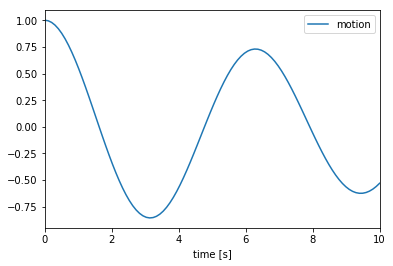

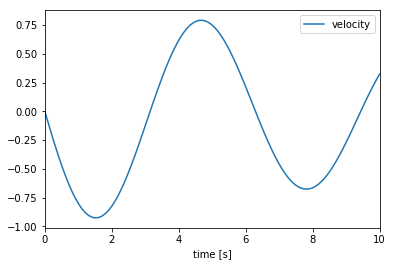

In [187]:
t = np.linspace(0,10,100)

x0 = np.array([1,0])
F_ = 0.0
numerical_specified = np.array([F_])
m_ = 1
c_ = 0.1
k_ = 1
numerical_constants = np.array([m_,c_,k_])

df = pd.DataFrame(index=t)
y = odeint(right_hand_side, x0, t, args=(numerical_specified, numerical_constants))

df['motion'] = y[:,0]
df['velocity'] = y[:,1]

fig,ax = plt.subplots()
df.plot(y='motion', ax=ax);
ax.set_xlabel('time [s]')

fig,ax = plt.subplots()
df.plot(y='velocity', ax=ax);
ax.set_xlabel('time [s]')

Text(0.5, 0, 'time [s]')

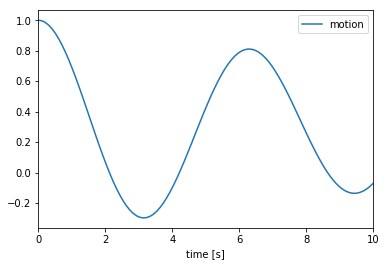

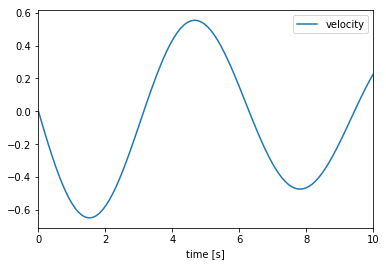

In [188]:
t = np.linspace(0,10,100)

x0 = np.array([1,0])
F_ = 0.3
numerical_specified = np.array([F_])
m_ = 1
c_ = 0.1
k_ = 1
numerical_constants = np.array([m_,c_,k_])

df = pd.DataFrame(index=t)
y = odeint(right_hand_side, x0, t, args=(numerical_specified, numerical_constants))

df['motion'] = y[:,0]
df['velocity'] = y[:,1]

fig,ax = plt.subplots()
df.plot(y='motion', ax=ax);
ax.set_xlabel('time [s]')

fig,ax = plt.subplots()
df.plot(y='velocity', ax=ax);
ax.set_xlabel('time [s]')